In [2]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

# Penalty function approixation

## Generate data

In [73]:
m = 100 # no. of samples
n = 30 # no. of features
A = np.random.randn(m, n) 
b = np.random.randn(m) 

## L1 approx
Minimize $\|Ax-b\|_1$

In [48]:
x = cp.Variable(n)

residuals1 = A @ x - b
cost = cp.norm(residuals1, p=1)
prob = cp.Problem(cp.Minimize(cost))
prob.solve()

# print(f"The optimal x is {x.value}")

60.89897645316207

## L2 approx
Minimize $\|Ax-b\|_2$

In [49]:
x = cp.Variable(n)

residuals2 = A @ x - b
cost = cp.norm(residuals2, p=2)
prob = cp.Problem(cp.Minimize(cost))
prob.solve()

# print(f"The optimal x is {x.value}")
# res = A @ x - b
# plot_residuals(res.value)

7.995193378998265

## Dead zone approx
Minimize $\|Ax-b\|_2$ subject to  $$\phi(u) = \begin{cases} 
0 & \text{if } |u| \leq a \\
|u| - a & \text{if } |u| > a 
\end{cases}$$

In [ ]:
x = cp.Variable(n)
a = 0.5  # threshold for the dead zone

# Define the dead zone penalty function
def dead_zone(u, a):
    return cp.maximum(0, cp.abs(u) - a)

# Define the cost function using the dead zone penalty
residuals3 = A @ x - b
cost = cp.sum(dead_zone(residuals3, a))

# Define and solve the problem
prob = cp.Problem(cp.Minimize(cost))
prob.solve()

23.109878966996497

# Residuals comparison

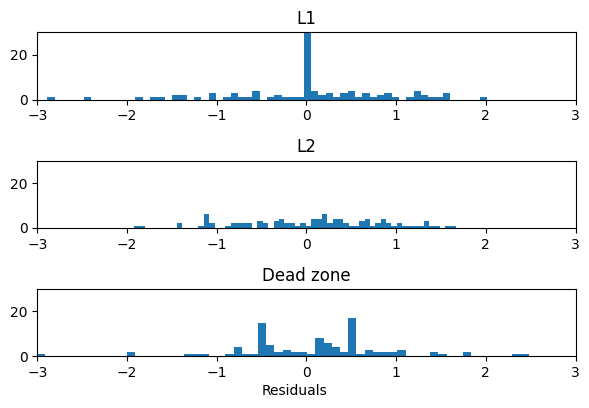

In [81]:
import matplotlib.pyplot as plt

bins = 60

fig, axs = plt.subplots(3, figsize=(6, 4))
fig.text(0.5, 0.0, 'Residuals', ha='center')
axs[0].hist(residuals1.value, bins=bins)
axs[0].set_title('L1')
axs[1].hist(residuals2.value, bins=bins)
axs[1].set_title('L2')
axs[2].hist(residuals3.value, bins=bins)
axs[2].set_title('Dead zone')

for ax in axs:
    ax.set_ylim([0, 30])  # Set all subplots to same height
    ax.set_xlim([-3, 3])  # Set all subplots to same height

plt.tight_layout()
plt.show()